# Import các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Nguồn dữ liệu

Ở đồ án này, nhóm em dùng dữ liệu được public trên Kaggle là [Netflix Movies and TV Shows](https://www.kaggle.com/shivamb/netflix-shows); dữ liệu này bao gồm các chương trình truyền hình và phim có sẵn trên Netflix từ năm 2019. Dữ liệu được được cấp phép sử dụng(License: CC0: Public Domain). Tập dữ liệu được thu thập từ Flixable, một công cụ tìm kiếm Netflix của bên thứ ba

# Khám phá dữ liệu

## Đọc dữ liệu từ file CSV vào DataFrame

In [2]:
nmts_df = pd.read_csv('netflix_titles.csv', index_col='show_id')
nmts_df.sample(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1109,TV Show,Broadchurch,NaN,"David Tennant, Olivia Colman, Andrew Buchan, J...",United Kingdom,"November 27, 2017",2017,TV-MA,3 Seasons,"British TV Shows, Crime TV Shows, Internationa...",After a young boy is murdered in the small sea...
s1360,TV Show,Christiane Amanpour: Sex & Love Around the World,NaN,NaN,United States,"September 30, 2018",2018,TV-MA,1 Season,Docuseries,"A contextual, acculturated dive into how adult..."
s739,Movie,Barbie in Princess Power,Zeke Norton,"Kelly Sheridan, Britt Irvin, Michael Kopsa, Re...",United States,"October 1, 2017",2015,TV-Y,74 min,Children & Family Movies,A princess with a predictable life finds herse...
s5609,Movie,Sillu Karuppatti,Halitha Shameem,"Nivedhithaa Sathish, Leela Samson, Samuthiraka...",India,"January 26, 2020",2019,TV-14,133 min,"Comedies, Dramas, Independent Movies",From first crushes to post-marriage relationsh...
s447,Movie,Amar Akbar Anthony,Manmohan Desai,"Vinod Khanna, Rishi Kapoor, Amitabh Bachchan, ...",India,"December 31, 2019",1977,TV-14,172 min,"Action & Adventure, Classic Movies, Comedies","Abandoned in a park by their father, Amar, Akb..."


## Dữ liệu có bao nhiêu dòng và bao nhiêu cột

In [3]:
nrows, ncols = nmts_df.shape
print(f"Dữ liệu có {nrows} dòng và {ncols} cột")

Dữ liệu có 7787 dòng và 11 cột


## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo quan sát, mỗi dòng cho biết thông tin của TV Show/Movie . Và không tìm thấy dòng nào có ý nghĩa khác

## Số lượng các dòng có bị lặp?

In [4]:
nmts_df.duplicated().sum()

0

## Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả của các cột trong tập dữ liệu

- **show_id**: Unique ID for every Movie / Tv Show
- **type** : Identifier - A Movie or TV Show
- **title**: Title of the Movie / Tv Show
- **director**: Director of the Movie
- **cast**: Actors involved in the movie / show
- **country**: Country where the movie / show was produced
- **date_added**: Date it was added on Netflix
- **release_year**: Actual Release year of the move / show
- **rating**: TV Rating of the movie / show
- **duration**: Total Duration - in minutes or number of seasons
- **listed_in**: Genre
- **description**: The summary description

## Kiểu dữ liệu của mỗi cột có phù hợp không?

In [5]:
nmts_df.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

**Vấn đề cần xử lý:**
- Cột "date_added" đang có dạng là `str`. Ta chuyển về kiểu `datetime`
- Cột "duration" cũng có kiểu dữ liệu Object nhưng mà do các giá trị trong cột này bao gồm 2 kiểu.

    - season tương ứng với TV Show
    - min tương ứng với Movie
    - Vì vậy ta sẽ không cần chuyển cột này qua dạng datetime

# Tiền xử lý

## Chuyển dtype của cột "date_added" sang datetime

In [6]:
nmts_df.date_added = pd.to_datetime(nmts_df.date_added.str.strip(), format='%B %d, %Y')

In [7]:
nmts_df.dtypes

type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

# Khám phá dữ liệu (tiếp tục)

## Với mỗi cột có kiểu dữ liệu numeric, các giá trị được phân bố như thế nào?

In [8]:
def missing_ratio(s):
    return s.isna().mean()*100

In [9]:
nume_col_profiles_df = nmts_df[['date_added','release_year']].apply([min, missing_ratio, max])
nume_col_profiles_df

,date_added,release_year
min,2008-01-01 00:00:00,1925.0
missing_ratio,0.128419,0.0
max,2021-01-16 00:00:00,2021.0


## Với mỗi cột có kiểu dữ liệu categorical, các giá trị được phân bố như thế nào?

In [10]:
def diff_vals(s):
    return s.unique()
def num_diff_vals(s):
    return s.nunique()

In [11]:
cate_col = ['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description']
nmts_df[cate_col].apply([missing_ratio, num_diff_vals, diff_vals])

,type,title,director,cast,country,rating,listed_in,description
missing_ratio,0.0,0.0,30.679337,9.220496,6.510851,0.089893,0.0,0.0
num_diff_vals,2,7787,4049,6831,681,14,492,7769
diff_vals,"[TV Show, Movie]","[3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19...","[nan, Jorge Michel Grau, Gilbert Chan, Shane A...","[João Miguel, Bianca Comparato, Michel Gomes, ...","[Brazil, Mexico, Singapore, United States, Tur...","[TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y...","[International TV Shows, TV Dramas, TV Sci-Fi ...",[In a future where the elite inhabit an island...


**Vấn đề cần xử lý:**
- Số giá trị khác nhau của cột "rating" là 14, có khác biệt so với với mô tả. Ta cần tìm hiểu sâu hơn
- Số giá trị khác nhau của cột "description" là 7759, tức là có một số phim hoặc chương trình truyền hình có mô tả giống nhau. Ta cần quan sát và xử lý các trường hợp này

## Tìm hiểu sâu hơn ở cột "rating"

In [12]:
diff_vals(nmts_df.rating)

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

Theo [MÔ TẢ CỦA NETFLIX](https://help.netflix.com/en/node/2064/us)

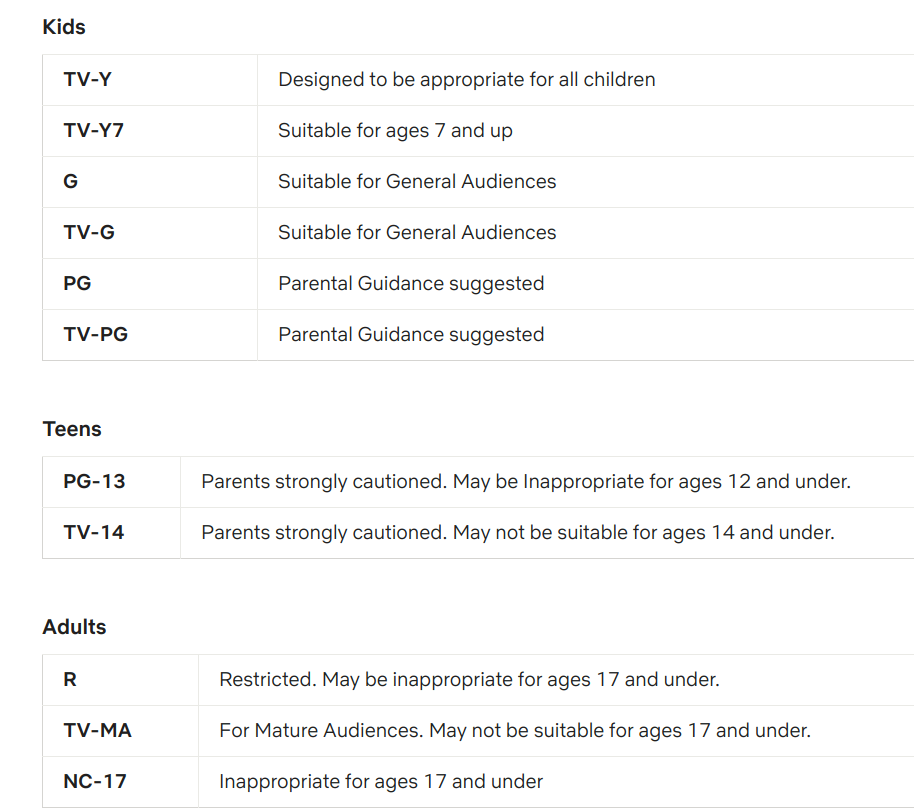

- Ta thấy có các rating không nằm trong mô tả như "NR", "UR" và "TV-Y7-FV". Sau khi tìm kiếm thì nhóm em nhận thấy "NR" là No rated cũng tương đương với "UR" là Unrated, và các dữ liệu bị thiếu cũng có ý nghĩa tương tự. Do đó nhóm chuyển tất cả về "NR"
- Ngoài ra, theo [TV Parental Guidelines](https://en.wikipedia.org/wiki/TV_Parental_Guidelines) thì "FV – Fantasy violence (exclusive to the TV-Y7 rating)" do đó ta thay "FV" cho "TV-Y7-FV"

In [13]:
nmts_df.rating = nmts_df.rating.fillna('UR').replace('UR', 'NR')

In [14]:
nmts_df.rating = nmts_df.rating.replace("TV-Y7-FV", "FV")

In [15]:
nmts_df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'FV'], dtype=object)

## Tìm hiểu sâu hơn ở cột "description"

In [16]:
#Gom nhóm các dòng có "description" giống nhau
duplicated_description = nmts_df[nmts_df.description.duplicated(keep=False)].groupby('description')
#quan sát kết quả
duplicated_description.apply(display)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s2861,Movie,Hum Saath-Saath Hain,Sooraj R. Barjatya,"Salman Khan, Karisma Kapoor, Saif Ali Khan, Ta...",India,2018-01-01,1999,TV-G,176 min,"Dramas, International Movies, Music & Musicals",A scheming matriarch plots to cut off her disa...
s7130,Movie,Together For Eternity,Sooraj R. Barjatya,"Salman Khan, Karisma Kapoor, Saif Ali Khan, Ta...",India,2020-02-01,1999,TV-G,176 min,"Dramas, International Movies, Music & Musicals",A scheming matriarch plots to cut off her disa...


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s4594,Movie,Oh! Baby,B. V. Nandini Reddy,"Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...",India,2019-09-14,2019,TV-14,157 min,"Comedies, International Movies, Music & Musicals",A surly septuagenarian gets another chance at ...
s4595,Movie,Oh! Baby (Malayalam),B. V. Nandini Reddy,"Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...",NaN,2019-09-25,2019,TV-14,146 min,"Comedies, International Movies, Music & Musicals",A surly septuagenarian gets another chance at ...
s4596,Movie,Oh! Baby (Tamil),B. V. Nandini Reddy,"Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...",NaN,2019-09-25,2019,TV-14,146 min,"Comedies, International Movies, Music & Musicals",A surly septuagenarian gets another chance at ...


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s5699,Movie,Solo: A Star Wars Story,Ron Howard,"Alden Ehrenreich, Woody Harrelson, Emilia Clar...",United States,2019-01-09,2018,PG-13,135 min,"Action & Adventure, Children & Family Movies, ...",A young Han Solo tries to settle an old score ...
s5700,Movie,Solo: A Star Wars Story (Spanish Version),Ron Howard,"Alden Ehrenreich, Woody Harrelson, Emilia Clar...",United States,2019-01-09,2018,PG-13,135 min,"Action & Adventure, Children & Family Movies, ...",A young Han Solo tries to settle an old score ...


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s369,Movie,Ala Vaikunthapurramuloo,Trivikram Srinivas,"Allu Arjun, Pooja Hegde, Tabu, Sushanth, Nivet...",India,2020-02-27,2020,TV-14,162 min,"Action & Adventure, Comedies, Dramas",After growing up enduring criticism from his f...
s526,Movie,Angu Vaikuntapurathu (Malayalam),Trivikram Srinivas,"Allu Arjun, Pooja Hegde, Tabu, Sushanth, Nivet...",NaN,2020-03-05,2020,TV-14,162 min,"Action & Adventure, Comedies, Dramas",After growing up enduring criticism from his f...


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s4839,Movie,Petta,Karthik Subbaraj,"Rajnikanth, Vijay Sethupathi, M. Sasikumar, Na...",India,2019-04-05,2019,TV-14,170 min,"Action & Adventure, Comedies, Dramas","An affable, newly appointed college warden pro..."
s4840,Movie,Petta (Telugu Version),Karthik Subbaraj,"Rajnikanth, Vijay Sethupathi, M. Sasikumar, Na...",NaN,2019-04-07,2019,TV-14,170 min,"Action & Adventure, Comedies, Dramas","An affable, newly appointed college warden pro..."


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s5397,Movie,Sarvam Thaala Mayam (Tamil Version),Rajiv Menon,"G.V. Prakash Kumar, Nedumudi Venu, Aparna Bala...",NaN,2019-03-01,2018,TV-14,131 min,"Dramas, International Movies, Music & Musicals",An aspiring musician battles age-old caste div...
s5398,Movie,Sarvam Thaala Mayam (Telugu Version),Rajiv Menon,"G.V. Prakash Kumar, Nedumudi Venu, Aparna Bala...",India,2019-04-08,2018,TV-14,131 min,"Dramas, International Movies, Music & Musicals",An aspiring musician battles age-old caste div...


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s510,Movie,Andhaghaaram,V Vignarajan,"Vinoth Kishan, Arjun Das, Pooja Ramachandran, ...",NaN,2020-11-24,2020,TV-14,171 min,"Horror Movies, International Movies, Thrillers","As a blind librarian, dispirited cricketer and..."
s511,Movie,Andhakaaram,V Vignarajan,"Vinoth Kishan, Arjun Das, Pooja Ramachandran, ...",India,2020-11-24,2020,TV-14,171 min,"Horror Movies, International Movies, Thrillers","As a blind librarian, dispirited cricketer and..."


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s2343,Movie,Game Over (Hindi Version),Ashwin Saravanan,"Taapsee Pannu, Vinodhini, Parvathi T, Ramya Su...",NaN,2019-08-21,2019,TV-MA,98 min,"Horror Movies, International Movies, Thrillers","As a series of murders hit close to home, a vi..."
s2344,Movie,Game Over (Tamil Version),Ashwin Saravanan,"Taapsee Pannu, Vinodhini, Parvathi T, Ramya Su...","India, Turkey",2019-08-21,2019,TV-MA,98 min,"Horror Movies, International Movies, Thrillers","As a series of murders hit close to home, a vi..."


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s501,Movie,Anaamika,Sekhar Kammula,"Nayantara, Vaibhav Reddy, Pasupathy, Harshvard...",India,2020-09-17,2014,TV-14,130 min,"International Movies, Thrillers",As a woman scours Hyderabad for her missing hu...
s4442,Movie,Nee Enge En Anbe,Sekhar Kammula,"Nayantara, Vaibhav Reddy, Pasupathy, Harshvard...",NaN,2020-09-17,2014,TV-14,137 min,"International Movies, Thrillers",As a woman scours Hyderabad for her missing hu...


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s6039,TV Show,Thackeray,NaN,NaN,India,2019-05-25,2019,TV-MA,1 Season,TV Shows,From controversial cartoonist to powerful Mumb...
s6040,Movie,Thackeray (Hindi),Abhijit Panse,"Nawazuddin Siddiqui, Amrita Rao, Rajeev Panday...",India,2020-06-26,2019,TV-14,135 min,"Dramas, International Movies",From controversial cartoonist to powerful Mumb...


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s133,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,2019-07-30,2019,TV-14,1 Season,TV Shows,Multiple women report their husbands as missin...
s5511,Movie,Seven (Tamil),NaN,NaN,India,2020-06-26,2019,TV-MA,111 min,"Dramas, International Movies, Romantic Movies",Multiple women report their husbands as missin...
s5512,Movie,Seven (Telugu),NaN,NaN,NaN,2020-06-26,2019,TV-14,116 min,"Dramas, International Movies, Romantic Movies",Multiple women report their husbands as missin...


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1486,Movie,Consequences,Ozan Açıktan,"Nehir Erdoğan, Tardu Flordun, İlker Kaleli, Se...",Turkey,2019-10-25,2014,TV-MA,106 min,"Dramas, International Movies, Thrillers",Secrets bubble to the surface after a sensual ...
s1487,Movie,Consequences,Ozan Açıktan,"Nehir Erdoğan, Tardu Flordun, İlker Kaleli, Se...",Turkey,2019-10-25,2014,TV-MA,106 min,"Dramas, International Movies, Thrillers",Secrets bubble to the surface after a sensual ...


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1377,TV Show,"ChuChu TV Kids Songs, Learning Videos & Bedtim...",NaN,NaN,NaN,2019-10-18,2019,TV-Y,1 Season,Kids' TV,This educational series for tiny tots features...
s1378,TV Show,ChuChu TV Nursery Rhymes & Kids Songs (Hindi),NaN,NaN,India,2020-04-18,2019,TV-Y,1 Season,Kids' TV,This educational series for tiny tots features...


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s4606,TV Show,Ollie & Moon,NaN,"Mattea Conforti, Kobi Frumer",France,2018-03-28,2018,TV-Y,1 Season,Kids' TV,"Two quirky cats, Ollie and Moon, and their fri..."
s6722,TV Show,The Ollie & Moon Show,NaN,"Mattea Conforti, Kobi Frumer",France,2020-01-14,2018,TV-Y,1 Season,Kids' TV,"Two quirky cats, Ollie and Moon, and their fri..."


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s2986,Movie,Incredibles 2 (Spanish Version),Brad Bird,"Víctor Trujillo, Consuelo Duval, Darío T. Pie,...",United States,2019-02-08,2018,PG,118 min,"Children & Family Movies, Comedies",When Elastigirl gets recruited for a high-prof...
s6488,Movie,The Incredibles 2,Brad Bird,"Craig T. Nelson, Holly Hunter, Samuel L. Jacks...",United States,2019-01-30,2018,PG,118 min,"Children & Family Movies, Comedies",When Elastigirl gets recruited for a high-prof...


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1287,Movie,Chashme Baddoor,David Dhawan,"Rishi Kapoor, Ali Zafar, Taapsee Pannu, Siddha...",India,2020-07-05,2013,TV-14,121 min,"Comedies, International Movies, Music & Musicals",When pretty new neighbor Seema falls for their...
s1288,Movie,Chashme Buddoor,David Dhawan,"Ali Zafar, Siddharth, Divyendu Sharma, Tapsee ...",India,2017-05-01,2013,TV-PG,121 min,"Comedies, International Movies, Music & Musicals",When pretty new neighbor Seema falls for their...


""


Quan sát các nhóm phim và chương trình truyền hình có cùng mô tả, ta cần xử lý các vấn đề sau:
- Các Movie/TV Show có tên khác nhau nhưng thực tế là cùng một phim:
    - Phim "Hum Saath-Saath Hain" và "Together For Eternity" là cùng một phim, tên "Together For Eternity" là tên khi được chiếu ở Úc. Tham khảo [ở đây](https://www.imdb.com/title/tt0216817/releaseinfo). Ta sẽ xóa phim có "id_show" là "s7130"
    - Chương trình The Ollie & Moon Show có thể là tên mới của Ollie & Moon, do nhóm em không tìm ra chương trình Ollie & Moon trên Netflix. Vì vậy ta xóa chương trình có "id_show" là "s4606"
    - Tương tự,phim 'Anaamika' và 'Nee Enge En Anbe' là cùng một phim. Tên 'Nee Enge En Anbe' là tên sau này của phim 'Anaamika'. Tham khảo [ở đây](https://en.wikipedia.org/wiki/Anaamika). Ta sẽ xóa phim có "id_show" là "s4442"
    - Phim 'Andhaghaaram' và 'Andhakaaram' cũng là cùng một phim, do khác nhau về ngôn ngữ Tamil và Telugu. Ta sẽ xóa một trong hai phim, nhóm em chọn phim có "id_show" là "s510" vì nó bị thiếu giá trị ở cột "country"
    
    - Có các phim có nhiều version ngôn ngữ khác nhau, do đó ta chỉ nên tính là một phim. Vậy ta sẽ xóa các phim có "id_show" như sau: "s526", "s4595", "s4596", "s5700", "s4840", "s1337", "s1377", "s2986", "s2343", "s5397"

- Có một số phim vừa có type là 'Movie' vừa có type là 'TV Show'. Các phim cần xử lý là: Thackeray và Seven

- Hai phim 'Chashme Buddoor' và 'Chashme Baddoor' có vấn đề như sau: theo [Wikipeadia](https://en.wikipedia.org/wiki/Chashme_Baddoor_(2013_film)) thì 'Chashme Baddoor' (2013) được làm lại từ phim 'Chashme Buddoor' (1981). Tuy nhiên các thông tin director, cast, duration... về phim 'Chashme Buddoor' thì lại giống hệt phim 'Chashme Baddoor' và điều này là không đúng. Do đó nhóm em sẽ xóa phim 'Chashme Buddoor' khỏi DataFrame, "id_show" của phim này là "s1288"

- Phim 'Consequences' có hai dòng có tên giống nhau, ta sẽ tìm hiểu nguyên nhân ở phần sau

# Tiền xử lý (tiếp tục)


## Xóa các dòng như đã phân tích

Theo như phân tích ở trên, ta sẽ xóa các phim có "id_show" như sau: "s7130", "s4442",  "s510", "s526", "s4595", "s4596", "s5700", "s4840", "s1337", "s1377", "s2986", "s2343", "s5397", "s4606", "s1288"

In [17]:
nmts_df.drop(["s7130", "s4442", "s510", "s526", "s4595", "s4596", "s5700", "s4840", "s1337", 
              "s1377", "s2986", "s2343", "s5397", "s4606", "s1288"], inplace=True)

## Xử lý phim vừa thuộc "TV Show" vừa thuộc "Movie": 'Thackeray'

Do phim này có dòng "type" = "Movie" không bị thiếu dữ liệu nên ta chỉ cần xóa dòng có type = "TV Show". Dòng này có "id_show" là "s6039"

In [18]:
nmts_df.drop(["s6039"], inplace=True)

## Xử lý phim vừa thuộc "TV Show" vừa thuộc "Movie": 'Seven'

Do phim này có dòng "type" = "Movie" bị thiếu dữ liệu ở cột "director" và "cast" nên ta cần lấy dữ liệu từ dòng có type = "TV Show". Sau đó xóa các dòng thừa còn lại

In [19]:
nmts_df.loc["s5511", ["director", "cast"]]= nmts_df.loc["s133", ["director", "cast"]]

In [20]:
# Xóa các dòng thừa
nmts_df.drop(["s133", "s5512"], inplace=True)

## Xử lý phim 'Consequences'

Trước tiên ta cần xem xét vấn đề là gì? Tại sao tên của các phim lại giống hệt nhau

In [21]:
nmts_df.loc['s1486','title']

'Consequences'

In [22]:
nmts_df.loc['s1487','title']

'Consequences\xa0'

Ta dễ thấy phim có "id_show" là "s1487" bị thừa kí tự /xa0. Do đó ta sẽ xóa phim này

In [23]:
nmts_df.drop(["s1487"], inplace=True)

# Đưa ra câu hỏi cần trả lời

- Khi hợp tác sản xuất phim với Hàn Quốc, Netflix tập trung vào thể loại nào?
- Tỉ lệ sản xuất nội dung phù hợp cho thiếu nhi qua các năm như thế nào?

Câu hỏi 1: Đâu là thể loại phim được mọi người đón nhận và đánh giá cao ?
Việc trả lời câu hỏi này giúp cung cấp thông tin cho nhà sản xuất phim, ở đây là Netflix, có cái nhìn rõ nét về xu hướng xem phim của người dùng. Từ đó giúp Netflix có thể đưa ra chính sách phát triển các bộ phim có thể loại mà người dùng ưa thích. Thông qua đó mang lại trải nghiệm tốt cho người dùng cũng như là lợi nhuận cho công ty. Đồng thời việc biết được các thể loại phim được người dùng đón nhận và đánh giá cao giúp cho các chiến dịch quảng cáo đánh mạnh được vào thị hiếu của người dùng hơn, từ đó có thể thu hút được những người dùng mới sử dụng Netflix. Mặt khác việc này còn có thể giúp người dùng biết được đâu là các thể loại phim hot từ đó có thể chọn được các bộ phim mang đến trải nghiệm xem phim một cách tuyệt vời

Câu hỏi 2: Các quốc gia nào sản xuất TV Show/Movie hàng đầu Netflix ?
Việc trả lời câu hỏi này giúp cho người dùng có thể biết được Netflix phát triển mạnh mẽ ở các khu vực nào, trên Netflix tập trung phim của quốc gia nào. Nó giúp cho người dùng có thể biết được là liệu Netflix có thích hợp với nhu cầu xem phim trực tuyến của bản thân mình hay không (bởi vì giả sử như người dùng thích phim Trung Quốc mà Netflix lại không có nhiều phim Trung Quốc vậy thì nên chọn ứng dụng xem phim trực tuyến khác như FPT, Vieon,...)

## Câu hỏi 1

Tỉ lệ sản xuất nội dung phù hợp cho thiếu nhi qua các năm như thế nào?

## Câu hỏi 2

Các quốc gia nào sản xuất TV Show/Movie hàng đầu Netflix ?
Việc trả lời câu hỏi này giúp cho người dùng có thể biết được Netflix phát triển mạnh mẽ ở các khu vực nào, trên Netflix tập trung phim của quốc gia nào. Nó giúp cho người dùng có thể biết được là liệu Netflix có thích hợp với nhu cầu xem phim trực tuyến của bản thân mình hay không (bởi vì giả sử như người dùng thích phim Trung Quốc mà Netflix lại không có nhiều phim Trung Quốc vậy thì nên chọn ứng dụng xem phim trực tuyến khác như FPT, Vieon,...)

# Nhìn lại quá trình làm đồ án

# Tài liệu tham khảo